In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
train_df = pd.read_csv('../datasets/liver_disease_train.csv', encoding='latin-1')
test_df = pd.read_excel('../datasets/liver_disease_test.xlsx')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (30691, 11)
Test shape: (2109, 10)


In [18]:
train_df.head(25)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [4]:
train_df.head()
train_df.info()
train_df.isnull().sum()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
missing = train_df.isnull().sum()
missing_pct = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)
print(missing_df)

                                      Missing_Count  Percentage
Gender of the patient                           902    2.938972
 Alkphos Alkaline Phosphotase                   796    2.593594
Total Bilirubin                                 648    2.111368
Direct Bilirubin                                561    1.827897
A/G Ratio Albumin and Globulin Ratio            559    1.821381
 Sgpt Alamine Aminotransferase                  538    1.752957
 ALB Albumin                                    494    1.609592
Total Protiens                                  463    1.508586
Sgot Aspartate Aminotransferase                 462    1.505327
Age of the patient                                2    0.006517


Target Distribution:
Result
1    21917
2     8774
Name: count, dtype: int64

Percentage:
Result
1    71.411815
2    28.588185
Name: proportion, dtype: float64


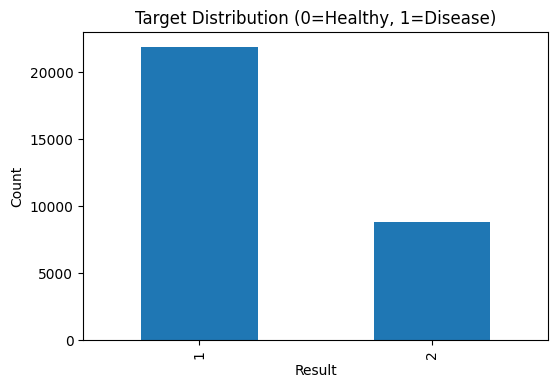

In [6]:
print("Target Distribution:")
print(train_df['Result'].value_counts())
print("\nPercentage:")
print(train_df['Result'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
train_df['Result'].value_counts().plot(kind='bar')
plt.title('Target Distribution (0=Healthy, 1=Disease)')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

Gender Distribution:
Gender of the patient
Male      21986
Female     7803
Name: count, dtype: int64


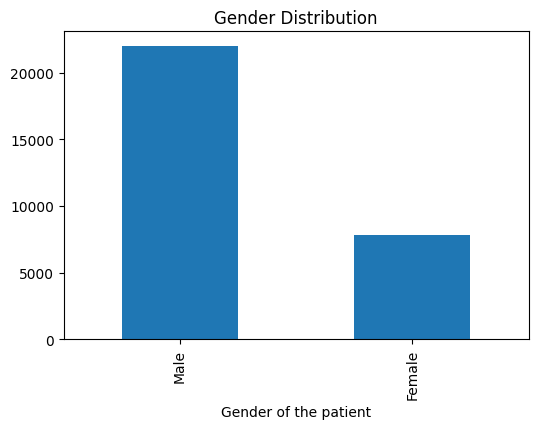

In [7]:
print("Gender Distribution:")
print(train_df['Gender of the patient'].value_counts())

plt.figure(figsize=(6, 4))
train_df['Gender of the patient'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.show()

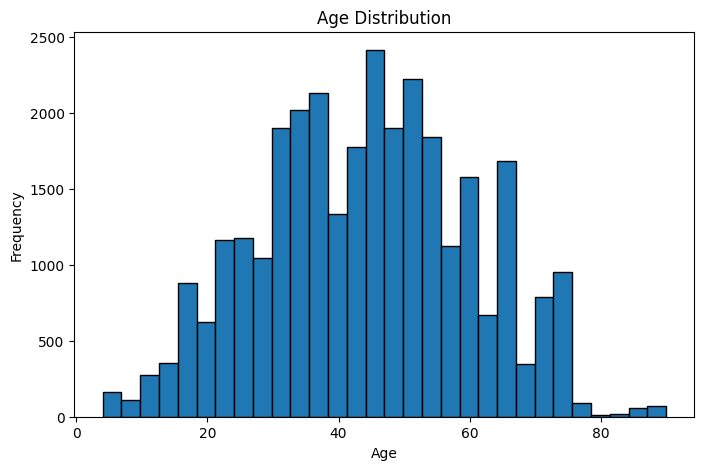

Age Statistics:
count    30689.000000
mean        44.107205
std         15.981043
min          4.000000
25%         32.000000
50%         45.000000
75%         55.000000
max         90.000000
Name: Age of the patient, dtype: float64


In [8]:
plt.figure(figsize=(8, 5))
plt.hist(train_df['Age of the patient'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("Age Statistics:")
print(train_df['Age of the patient'].describe())

In [10]:
# Remove extra spaces from column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

print("Cleaned column names:")
print(train_df.columns.tolist())

Cleaned column names:
['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']


In [11]:
numerical_cols = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 
                  'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
                  'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin',
                  'A/G Ratio Albumin and Globulin Ratio']

# Verify all columns exist
for col in numerical_cols:
    if col not in train_df.columns:
        print(f"Missing: {col}")

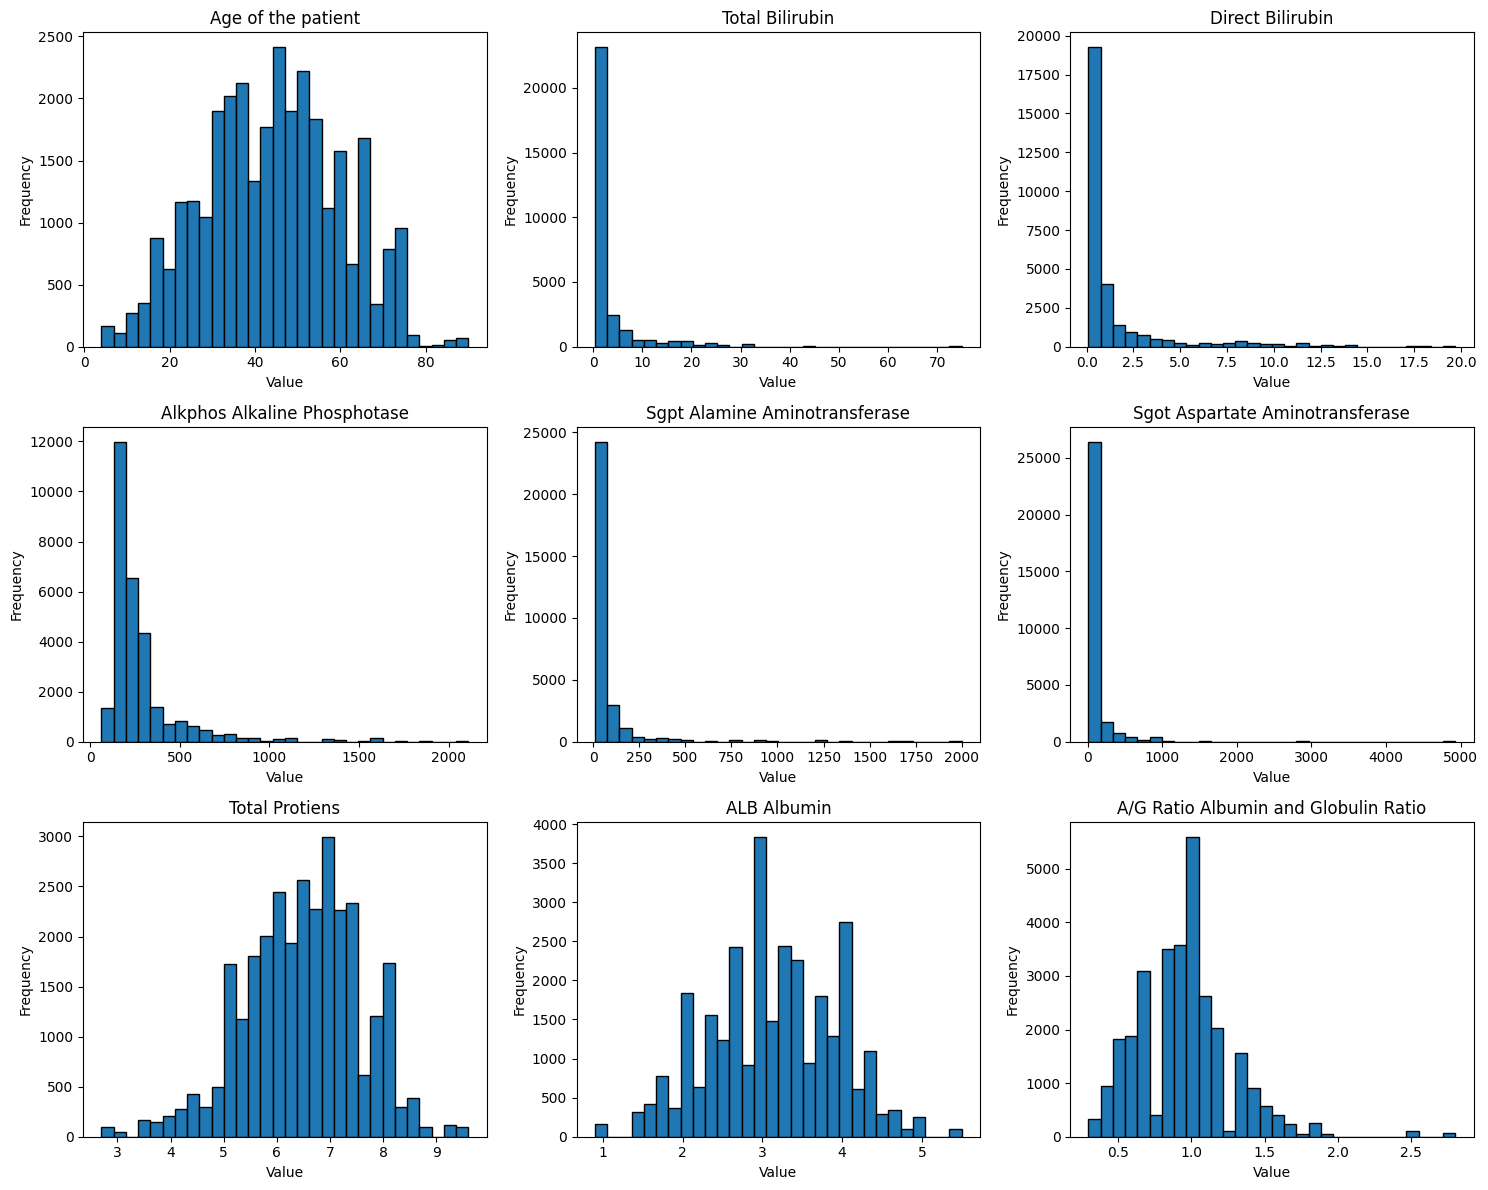

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(train_df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

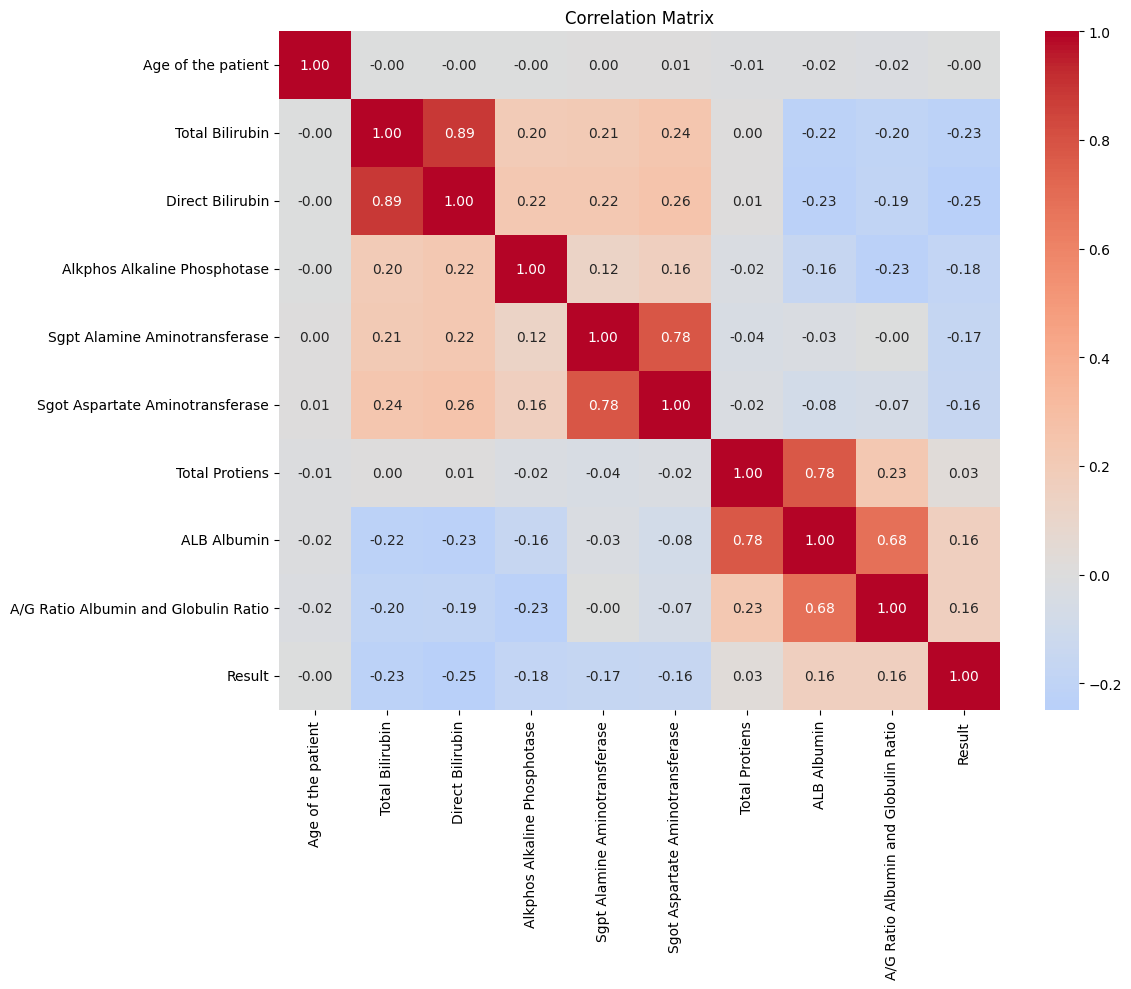


Correlation with Target (Result):
Result                                  1.000000
ALB Albumin                             0.160346
A/G Ratio Albumin and Globulin Ratio    0.158350
Total Protiens                          0.030370
Age of the patient                     -0.004759
Sgot Aspartate Aminotransferase        -0.158660
Sgpt Alamine Aminotransferase          -0.165914
Alkphos Alkaline Phosphotase           -0.183356
Total Bilirubin                        -0.225061
Direct Bilirubin                       -0.249538
Name: Result, dtype: float64


In [15]:
corr_cols = numerical_cols + ['Result']
correlation = train_df[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nCorrelation with Target (Result):")
print(correlation['Result'].sort_values(ascending=False))